# Human Activity Recognition Using Smartphones Dataset

## Random Forest with Classification and Clustering - Human Activity Predictor

Contoso Behavior Systems is developing an AI tool that will try to predict human activity (1-Walking, 2-Walking upstairs, 3-Walking downstairs, 4-Sitting, 5-Standing or 6-Laying) by using the smartphone’s sensors. Meaning that by using the following methods, the smartphone can detect what we are doing at the moment.

The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed.

### Description of experiment

The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKINGUPSTAIRS, WALKINGDOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

### Attribute information

* For each record in the dataset the following is provided:
* Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.
* Triaxial Angular velocity from the gyroscope.
* A 561-feature vector with time and frequency domain variables.
* Its activity label.
* An identifier of the subject who carried out the experiment.

### Planning

When we have a problem that we know how to solve, we can create a list of steps to guide us through the experiment.

1. Import the Necessary Python Libraries
2. Load and analyse the data
3. Find Correlations among the faetures
4. Split the data into train and test data(validation data)
5. Predict the activity using Logistic Regression

### 1. Import the Necessary Python Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as error_metric
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import VarianceThreshold

### 2. Load and analyse the data

In [3]:
train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")

In [4]:
print("--------- Training Data ---------")
print(train.head())
print("--------- Test Data ---------")
print(test.head())

--------- Training Data ---------
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  t

#### Check for null values in the data

In [5]:
print("Training Data:",train.isnull().values.any())
print("Testing Data:",test.isnull().values.any())

Training Data: False
Testing Data: False


No null values, let's proceed

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


#### Removing data that we won't use, in this case we don't care who was the "subject"
Reviewing the head values, we can notice that the subject column is not going to be usefull here so we will drop it from both data sets. Since there are so manu columns in the data, you might have missed it but it's just a number that was arbitrarily used to identify subjects.

### Dropping data

Remember that we can use the build in method .drop to remove columns from the dataset. We can use the interactive help to make sure we know what all the parameters are--to access the help, type train.drop? the question mark let's the interpreter know that we want to see some help.

In the [pandas.DataFrame.drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) method, the 'axis' parameter means that we are droping a column and the 'inplace' parameter means exactly that, do the operation in place and return None.

In [8]:
# We can do these both at once:

train.drop('subject', axis =1, inplace=True)
test.drop('subject', axis =1, inplace=True)

In [9]:
# Verify that the column was dropped
print("--------- Training Data ---------")
print(train.head())
print("--------- Test Data ---------")
print(test.head())

--------- Training Data ---------
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  t

In [10]:
# Let's creat a list of all the column labels.
rem_cols2 = test.columns.tolist()
rem_cols2

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [11]:
# We should also verify the different datatypes in our data, in this case we can see we have 
# 561 float type data dimensions and 1 object dimension.
print('----------TRAIN------------')
print(train.dtypes.value_counts())
print('----------TEST------------')
print(test.dtypes.value_counts())

----------TRAIN------------
float64    561
object       1
dtype: int64
----------TEST------------
float64    561
object       1
dtype: int64


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 562 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), object(1)
memory usage: 31.5+ MB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 562 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), object(1)
memory usage: 12.6+ MB


### Checkpoint

Should we rescale the data? Scaling a dataset usually produces better dataset and more accurate predictions. First we check the range( the min and the max) for each of the datasets. Lets try using the .describe() method and lets exclude the activity column which is the last column.

### Rescaling Data

When we 'rescale' data we add or subtract a constant and the multiply or divide by constnt to the original values. A good example of this is when we convert, or rescale tempature data from Celcius to Fahrenheit.

### Standardization and Normalization of our data

When we standard and normalize data, essentially we are trying to create data that is easily comparable--like turning an "apples to oranges" comparison into an "apples to apples" comparison. Standardizing the features around the center and 0 with a standard deviation of 1 is important when we compare measurements that have different units. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bais.

Similarly, the goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

### When should we normalize or standardize?

**Normalization** is a good technique to use when you do not know the distribution of your data or when you know the distribution is not Gaussian (a bell curve). Normalization is useful when your data has varying scales and the algorithm you are using does not make assumptions about the distribution of your data, such as k-nearest neighbors and artificial neural networks.

**Standardization** assumes that your data has a Gaussian distribution. This does not strictly have to be true, but the technique is more effective if your attribute distribution is Gaussian. Standardization is useful when your data has varying scales and the algorithm you are using does make assumptions about your data having a Gaussian distribution, such as linear regression, logistic regression, and linear discriminant analysis.

In [14]:
print('----------TRAIN------------')
print(train.describe())

----------TRAIN------------
       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        7352.000000        7352.000000        7352.000000   
mean            0.274488          -0.017695          -0.109141   
std             0.070261           0.040811           0.056635   
min            -1.000000          -1.000000          -1.000000   
25%             0.262975          -0.024863          -0.120993   
50%             0.277193          -0.017219          -0.108676   
75%             0.288461          -0.010783          -0.097794   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       7352.000000       7352.000000       7352.000000       7352.000000   
mean          -0.605438         -0.510938         -0.604754         -0.630512   
std            0.448734          0.502645          0.418687          0.424073   
min           -1.000000         -0.999873         -1.

In [15]:
print('----------TEST------------')
print(test.describe())

----------TEST------------
       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        2947.000000        2947.000000        2947.000000   
mean            0.273996          -0.017863          -0.108386   
std             0.060570           0.025745           0.042747   
min            -0.592004          -0.362884          -0.576184   
25%             0.262075          -0.024961          -0.121162   
50%             0.277113          -0.016967          -0.108458   
75%             0.288097          -0.010143          -0.097123   
max             0.671887           0.246106           0.494114   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       2947.000000       2947.000000       2947.000000       2947.000000   
mean          -0.613635         -0.508330         -0.633797         -0.641278   
std            0.412597          0.494269          0.362699          0.385199   
min           -0.999606         -1.000000         -0.9

 ### Scaling 
 
Now that we understand why we'd rescale or data, should we do it here? 

Here it's not necessary. We see that the min = -1 and the max = +1 so no need for scaling this data. There doesn't seem to be any strange or outlying data. In other words all the data is within a range that makes sense. Let's continue.

In [16]:
# Notice how we can use .tail() to also examine the datatypes of the last 

train.dtypes.tail()

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

They have the same data types. That is, mostly floats and one object feature. Lets see what is in the 'Activity' object feature is and extract it from the rest.

In [17]:
object_feature = train.dtypes == np.object
object_feature = train.columns[object_feature]
object_feature

Index(['Activity'], dtype='object')

As we can see, the only object data type in both train and the test dataset is the Activity feature. Lets take a closer look at it...

In [18]:
train.Activity.value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

We need to encode the Activity column becasue sklearn won't accept categorical data as our column labels. We will use [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) to encode the 'Activity' column.

#### LabelEndcoder in sklearn  
The LabelEncoder function can do a couple of things for us. It can normalize label column names or it can also convert categorical labels into numeric values, similar to the process of ["one-hot-encoding" in the Azure ML Studio](https://docs.microsoft.com/en-us/azure/machine-learning/studio-module-reference/convert-to-indicator-values), which essentially let's us create a binary system to covert categorical data into numbers.

Let's do that here with the LabelEncoder:

In [19]:
le = LabelEncoder()
for x in [train, test]:
    x['Activity'] = le.fit_transform(x.Activity)

In [20]:
train.Activity.sample(5)

1322    2
295     3
7073    3
1447    4
2475    3
Name: Activity, dtype: int64

In [21]:
test.Activity.sample(5)

1334    4
2392    2
663     1
1200    5
2887    3
Name: Activity, dtype: int64

### 3  Finding the Correlation/ Relationships between the features

Correlation refers to the mutual relationship and association between quantities and it is generaly used to express one quantity in terms of its relationship with other quantities. The correlation can either be Positive(variables change in the same direction), negative(variables change in opposite direction or neutral(No correlation).

Variables within a dataset can be related in lots of ways and for a lot of reasons:

- They could depend on values of other variable
- They could be associated to each other
- They could both depend on a thirf variable.

For this project we will be using the pandas method .corr() for calculating correlation between dataframe columns. If we train a model and test it on the same data, we would see something very interesting--probably nothing but perfect scores and it woul fail to predict anything useful on new data. 

When this situation arises, it's called overfitting. Something we'll discuss more in our Machine Learning workshops. To about it, it is common practice to when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test. We'll also perform a cross-validation step in the next section.

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when .

In [22]:
# Exclude the Activity column
feature_cols = train.columns[: -1] 

# Calculate the correlation values
correlated_values = train[feature_cols].corr()

# Stack the data and convert to a dataframe
correlated_values = (correlated_values.stack().to_frame().reset_index()
                    .rename(columns={'level_0': 'Feature_1', 'level_1': 'Feature_2', 0:'Correlations'}))
correlated_values.head()

Feature_1          Feature_2  Correlations
0  tBodyAcc-mean()-X  tBodyAcc-mean()-X      1.000000
1  tBodyAcc-mean()-X  tBodyAcc-mean()-Y      0.148061
2  tBodyAcc-mean()-X  tBodyAcc-mean()-Z     -0.256952
3  tBodyAcc-mean()-X   tBodyAcc-std()-X      0.000619
4  tBodyAcc-mean()-X   tBodyAcc-std()-Y     -0.021903

In [23]:
# Create an abs_correlation column
correlated_values['abs_correlation'] = correlated_values.Correlations.abs()
correlated_values.head()


Feature_1          Feature_2  Correlations  abs_correlation
0  tBodyAcc-mean()-X  tBodyAcc-mean()-X      1.000000         1.000000
1  tBodyAcc-mean()-X  tBodyAcc-mean()-Y      0.148061         0.148061
2  tBodyAcc-mean()-X  tBodyAcc-mean()-Z     -0.256952         0.256952
3  tBodyAcc-mean()-X   tBodyAcc-std()-X      0.000619         0.000619
4  tBodyAcc-mean()-X   tBodyAcc-std()-Y     -0.021903         0.021903

In [24]:
# Picking most correlated features
train_fields = correlated_values.sort_values('Correlations', ascending = False).query('abs_correlation>0.8')
train_fields.sample(5)

Feature_1             Feature_2  Correlations  \
112888      tBodyAccMag-std()     tBodyGyro-mad()-Y      0.845918   
12057        tBodyAcc-iqr()-Z      fBodyAcc-max()-Z      0.954655   
78079       tBodyGyro-iqr()-X  tBodyAccJerk-iqr()-Y      0.885586   
250649  fBodyGyro-entropy()-Y     fBodyGyro-iqr()-Y      0.843869   
152797       fBodyAcc-mad()-Y     tBodyAccMag-sma()      0.966421   

        abs_correlation  
112888         0.845918  
12057          0.954655  
78079          0.885586  
250649         0.843869  
152797         0.966421

### 4  Splitting the data into training and validation DataFrames¶


What we can do is perform a process of cross validation in model training. The best parameters can be determined by grid search techniques. In our example below, we'll use the [sklearn.model_selection.StratifiedShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) to perform our cross-validation steps.

In [25]:
#Getting the split indexes

split_data = StratifiedShuffleSplit(n_splits = 3, test_size = 0.3, random_state = 42)
train_idx, val_idx = next(split_data.split(train[feature_cols], train.Activity))

#creating the dataframes

x_train = train.loc[train_idx, feature_cols]
y_train = train.loc[train_idx, 'Activity']

x_val = train.loc[val_idx, feature_cols]
y_val = train.loc[val_idx, 'Activity']

In [26]:
y_train.value_counts(normalize = True)

0    0.191411
2    0.186941
1    0.174893
3    0.166731
5    0.145939
4    0.134085
Name: Activity, dtype: float64

In [27]:
y_val.value_counts(normalize = True)

0    0.191296
2    0.186763
1    0.174977
3    0.166818
5    0.145966
4    0.134180
Name: Activity, dtype: float64

#### Same ratio of classes in both the train and validation data thanks to StratifiedShuffleSplit
StratifiedShuffleSplit is a cross-validator that provides train/test indices to split data in train/test sets.

This cross-validation object is a merge of StratifiedKFold and ShuffleSplit, which returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class.

Notice that the ratios in the y_train dataframe the y_val dataframe are nearly the same. This tells us that the performance of our model is consistent throughout the three splits that we've created. We'll cover more about cross-validation concepts in our up coming machine learning workshop.

### 5. Predictive Modelling¶


Predictive modeling uses statistics to predict outcomes. Most often the event one wants to predict is in the future, but predictive modelling can be applied to any type of unknown event, regardless of when it occurred. 

Logistic regression, despite its name, is a linear model for classification rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.

Logistic regression is implemented in LogisticRegression. This implementation can fit binary, One-vs-Rest, or multinomial logistic regression with optional l1, l2, or Elastic-Net regularization. [Learn more about logistic regression by visiting the user guide.](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html?highlight=logisticregressioncv#sklearn.linear_model.LogisticRegressionCV)


In [28]:
# Our standard Logistic Regression algorithm
lr = LogisticRegression()

# We'll also use the Logistic Regression CV (Cross-Validation), with 4 folds.
# Here are the parameters and what each one of them does.

# Cs - List of ints of floats, default value is 10
# Each of the values in Cs describes the inverse of regularization strength. 
# If Cs is as an int, then a grid of Cs values are chosen in a logarithmic scale between 
# 1e-4 and 1e4. Like in support vector machines, smaller values specify stronger regularization.

# cv - Cross-validation generator

# penalty - Used to specify the norm used in the penalization. The ‘newton-cg’, ‘sag’ and ‘lbfgs’ 
# solvers support only l2 penalties. ‘elasticnet’ is only supported by the ‘saga’ solver.

# max-iter - Maximum number of iterations of the optimization algorithm.
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', max_iter=120)

# RandomForestClassifier - n=The number of trees in the forest. Default is 100
rf = RandomForestClassifier(n_estimators = 10)

lr = lr.fit(x_train, y_train)
rf = rf.fit(x_train, y_train)

lr_l2 = lr_l2.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    

In [30]:
#predict the classes and probability for each

y_predict = list()
y_proba = list()

labels = ['lr', 'lr_l2', 'rf']
models = [lr, lr_l2, rf]

for lab, mod in zip(labels, models):
    y_predict.append(pd.Series(mod.predict(x_val), name = lab))
    y_proba.append(pd.Series(mod.predict_proba(x_val).max(axis=1), name = lab))
    #.max(axis = 1) for a 1 dimensional dataframe

y_predict = pd.concat(y_predict, axis = 1)
y_proba = pd.concat(y_proba, axis = 1)

y_predict.head()

lr  lr_l2  rf
0   0      0   0
1   5      5   5
2   1      1   1
3   0      0   0
4   3      3   3

In [32]:
y_proba.head(10)

lr     lr_l2   rf
0  0.997087  0.998170  1.0
1  0.992294  0.996484  0.8
2  0.994263  0.999071  0.9
3  0.999999  1.000000  0.9
4  0.985666  0.995319  0.9
5  0.974776  0.989882  0.7
6  0.999968  0.999997  1.0
7  0.999725  0.999941  1.0
8  0.954409  0.956521  0.9
9  0.999788  0.999943  1.0

### Results are good - Conclusion

Looking at the results from logistic regression, logistic regression with L2 regularization, and the random forest classifier we are seeing good accuracy from our models. It appears the the best results are from the lr_l2 model, which makes sense since that is where we are performing regularization (to deal with outliers) and the cross-validation step that is taking place as well. For all intents and purposes, our experiment is done--however, we'll go on to learn about error metrics and what they are for.

### 6. Calculating the Error Metrics

Regressions are one of the most commonly used tools in a data scientist’s kit. When you learn Python, you gain the ability to create regressions in single lines of code without having to deal with the underlying mathematical theory. 

This ease can cause us to forget to evaluate our regressions to ensure that they are a sufficient enough representation of our data. We can plug our data back into our regression equation to see if the predicted output matches corresponding observed value seen in the data.

The quality of a regression model is how well its predictions match up against actual values, but how do we actually evaluate quality? Luckily, smart statisticians have developed error metrics to judge the quality of a model and enable us to compare regresssions against other regressions with different parameters. These metrics are short and useful summaries of the quality of our data.

We will look at the Precision, Recall, F-Score, and Accuracy as our error metrics. We are trying to figure our whether or not our model gives us more false/true positives(FP/TP) or more false/true negative responses(FN/TN). First of all, let's make sure we understand that all true positives and true negatives are usually good scores, depending on the type of data. Let's go over the error metrics in this project.

#### Accuracy 
Accuracy is the most straightforward metric, it's simply answers the question how many times did the model accurately predict the phone user's behavior.
**Accuracy = (TP+TN)/(TP+FP+FN+TN)**

#### Recall (aka Sensitivity)
Recall is the ratio of the activities that were predicted compared to activites that were actually observed in real life. Recall answers the following question: Of all the subject's activities that we predicted them to be doing at any given time, how many of thm were correct?
**Recall = TP/(TP+FN)**

#### Precision
Precision is the ratio of the correctly labeled activities by our program to all the activities labeled.
Precision answers the following: How many of those who we labeled doing an activity were actually doing the activity?
**Precision = TP/(TP+FP)**


#### F1-score (aka F-Score / F-Measure)
F1 Score considers both precision and recall. It is the harmonic mean(average) of the precision and recall.
F1 Score is best if there is some sort of balance between precision (p) & recall (r) in the system. Oppositely F1 Score isn’t so high if one measure is improved at the expense of the other.

For example, if P is 1 & R is 0, F1 score is 0.
F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [37]:
# Let's calculate the error metrics here, 
# We will also use a confusion matrix to better see where our results are coming from.
metrics = list()
confusion_m = dict()

for lab in labels:
    precision, recall, f_score, _ = error_metric(y_val, y_predict[lab], average = 'weighted')
    
    accuracy = accuracy_score(y_val, y_predict[lab])
    
    confusion_m[lab] = confusion_matrix(y_val, y_predict[lab])
    
    metrics.append(pd.Series({'Precision': precision, 'Recall': recall,
                            'F_score': f_score, 'Accuracy': accuracy}, name = lab))
    
metrics= pd.concat(metrics, axis =1) 
metrics

lr     lr_l2        rf
Precision  0.983251  0.986408  0.974170
Recall     0.983228  0.986401  0.974161
F_score    0.983235  0.986399  0.974163
Accuracy   0.983228  0.986401  0.974161

### Confusion Matrix
One great tool for evaluating the behavior and understanding the effectiveness of a binary or categorical classifier is the Confusion Matrix.

You can see that all of the metris we are seeing are giving us very high marks. This tells us that our model is performing very well. Let's plot the lr (logistic regression), and lr_l2 (Level 2 regularization), and the rf (random forests) in confusion matrices.

We've already fit a logistic regression model, the confusion matrix can be calculated manually, or since we are talented smart data scientists, we can just use the confusion_matrix function from sklearn.

The code below fits a Logistic Regression Model and outputs the confusion matrix. The 'lab' object are loaded with the data frames of our preditions. Be sure to use the interactive help to figure our what line of code does.


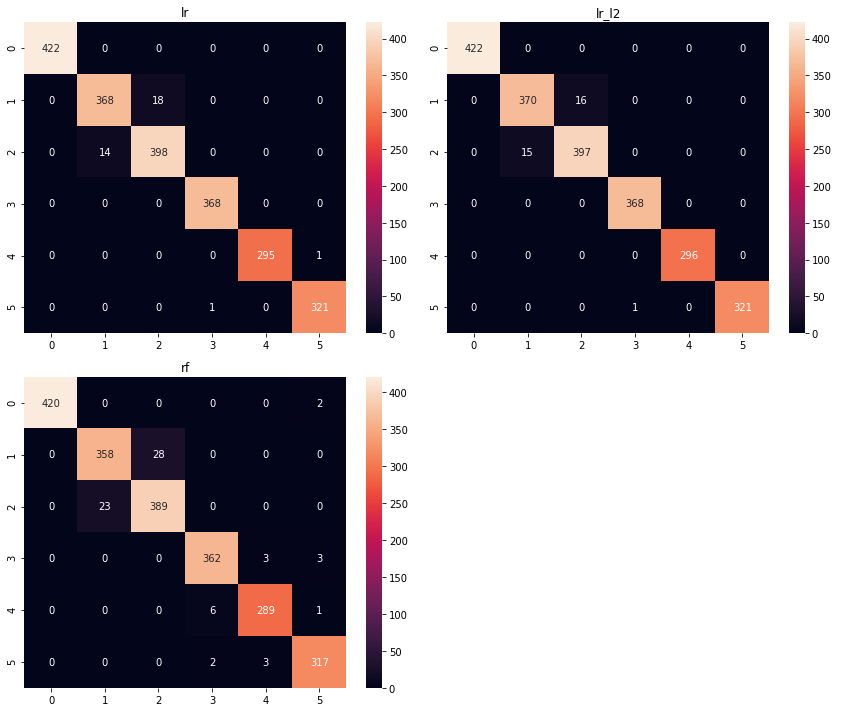

In [51]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], labels):
    sns.heatmap(confusion_m[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()


### Observations about Error Metrics and Ridge Regression

We can see that the Logistic regression with L2 regularization gives slightly better error metric than the other models.  The question we ask here is: What happens when we discard the most correlated feature? Will we have a better model? The answer is typically yes, we will get better results with we remove highly correlated features. We are addressing the 'curse of dimensionality' and the idea that too much correlated data in our experiment can cause it to be 'overfit' and will not be very effective working with similar data.

In following workshops, we'll learn more about cross-validation and using confusion matrices to check the performance and accuracy of our models.